In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
filename = 'data/lens_z_omlambda_0.0.csv'
# filename = 'data/dopri5_lens_z_omlambda_0.0.csv'
df = pd.read_csv(filename)
df.head()

,lens_z,percentage_err,step
0,0.050000,-0.004016,5.000000e-08
1,0.051515,-0.004006,5.000000e-08
2,0.053030,-0.004476,5.000000e-08
3,0.054545,-0.006538,5.000000e-08
4,0.056061,-0.004375,5.000000e-08


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
stats.columns = [' '.join(col).strip() for col in stats.columns.values]
stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
stats

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
1.000000e-08,-0.006226,0.003245,100,0.000325
3.000000e-08,-0.005832,0.003312,100,0.000331
3.250000e-08,-0.005899,0.003298,100,0.000330
5.000000e-08,-0.005853,0.003432,100,0.000343
5.500000e-08,-0.005831,0.003366,100,0.000337
6.000000e-08,-0.005557,0.003391,100,0.000339
7.750000e-08,-0.005791,0.003418,100,0.000342
1.000000e-07,-0.004533,0.003440,100,0.000344
1.090909e-07,-0.004682,0.003806,100,0.000381


In [5]:
# stats[stats['percentage_err mean'].abs() == stats['percentage_err mean'].abs().min()]
best_step_size = stats['percentage_err mean'].abs().idxmin()
print("This is the step size that gives the most accurate result: ", best_step_size)
print("This step size has mean of ", stats['percentage_err mean'].abs().min())

This is the step size that gives the most accurate result:  6.45454545455e-07
This step size has mean of  3.14368628937e-06


In [6]:
stats[stats.index > 6e-7]

,percentage_err mean,percentage_err std,percentage_err count,percentage_err mean std
step,,,,
6.020408e-07,0.000979,0.005373,100,0.000537
6.090909e-07,0.000219,0.005205,100,0.000521
6.122449e-07,-0.000013,0.004502,100,0.000450
6.181818e-07,0.000299,0.004200,100,0.000420
6.224490e-07,0.001334,0.005631,100,0.000563
6.272727e-07,0.000217,0.005274,100,0.000527
6.326531e-07,0.000496,0.006273,100,0.000627
6.363636e-07,0.000625,0.005281,100,0.000528
6.428571e-07,0.000742,0.005992,100,0.000599


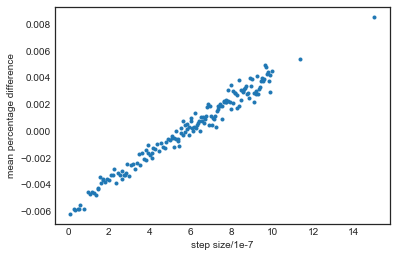

In [7]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('mean percentage difference')

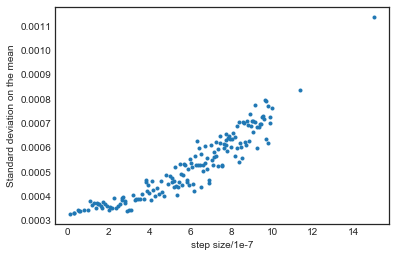

In [8]:
plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
plt.xlabel('step size/1e-7')
plt.ylabel('Standard deviation on the mean')

In [9]:
# filename = 'data/mass_omlambda_0.0.csv'
# df = pd.read_csv(filename)
# df.drop_duplicates(inplace=True)
# stats = df[['step', 'percentage_err']].groupby('step').agg(['mean', 'std', 'count'])
# stats.columns = [' '.join(col).strip() for col in stats.columns.values]
# stats['percentage_err mean std'] = stats['percentage_err std']/np.sqrt(stats['percentage_err count'])
# stats

In [10]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('mean percentage difference')

In [11]:
# plt.plot(stats.index.values/1e-7, stats['percentage_err mean std'].abs().values, '.')
# plt.xlabel('step size/1e-7')
# plt.ylabel('Standard deviation on the mean')